Heirarchichal Bayesian Analysis, the beggining.

In [1]:

import numpy as np 
import scipy.stats as st
import pymc as pm
import matplotlib.pyplot as plt 
import arviz as az 
import pickle 

In [2]:
Nobs=10**4

Data:
$$x_{true} \sim \mathcal{N}(\mu_p=10,\sigma_p=1)$$
$$x_{obs} \sim  \mathcal{N}(x_{true_i},0.5)$$


In [3]:
def gn(Nobs,mean,std,a,b):
    x = []
    while len(x) < Nobs:
        x1 = np.random.normal(mean, std)
        if (x1 <= a) or (x1 >= b):   
            x.append(x1)
    return np.array(x)

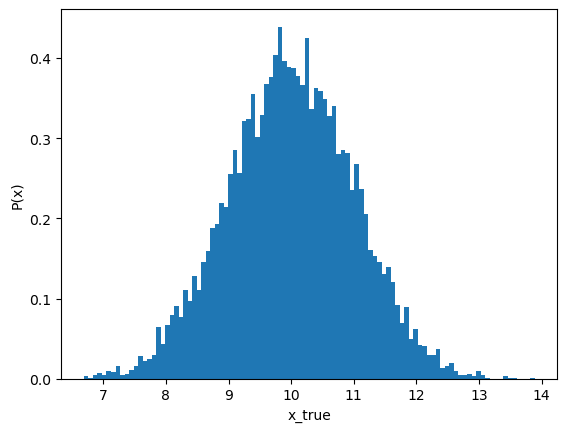

In [4]:
mu_p=10
sigma_p=1
x=gn(Nobs,mu_p,sigma_p,6,6)
plt.xlabel("x_true")
plt.ylabel("P(x)")
plt.hist(x,bins=100,density=True);

$$
\text{data generation:}
$$

$$
X \sim \mathcal{N}(\mu_p = 10, \, \sigma_p = 1)
$$
$$
X^{\text{obs}} \sim \mathcal{N}(\mu = X_i, \, \sigma = 0.5) 
\quad \sigma^2 = 0.5^2 \quad (\text{say})
$$


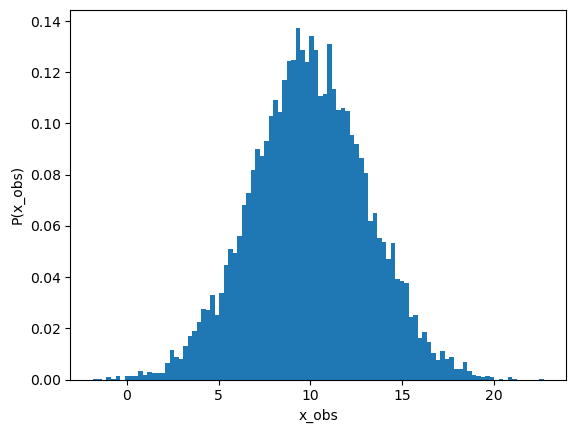

In [5]:
x_obs=[]
sigma_1=3
for i in range(Nobs):
    x_obs.append(np.random.normal(x[i],sigma_1))
plt.xlabel("x_obs")
plt.ylabel("P(x_obs)")
plt.hist(x_obs,bins=100,density=True);
    



$$
\text{Priors}
$$

$$
P(\mu_p) \sim U(0,20), 
\quad 
\sigma_p \sim U(0,5)
$$

$$
X \sim \mathcal{N}(\mu_p, \sigma_p)
$$

$$
\mathcal{L}(X_{\text{obs}} \mid\mu_p, \sigma_p) 
= \prod_{i=1}^{N_{\text{obs}}} \int \mathcal{L}(X^{\text{obs}}_i \mid X_i) \, P(X_i \mid \mu_p, \sigma_p) dX_i
$$

$$
= \prod_{i=1}^{N_{\text{obs}}} \int_X 
\mathcal{N}_{X^{\text{obs}}_i}(X_i, \sigma_i) \, \mathcal{N}_X(\mu_p, \sigma_p) \, dX_i
$$

$$
= \prod_{i=1}^{N_{\text{obs}}} \int_X 
\frac{1}{\sqrt{2\pi\sigma_i^2}} \,
\frac{1}{\sqrt{2\pi\sigma_p^2}} 
\exp\!\left( -\tfrac{1}{2} \Bigg[ 
\frac{(X_i^{\text{obs}} - X_i)^2}{\sigma_i^2} 
+ \frac{(X_i - \mu_p)^2}{\sigma_p^2} 
\Bigg] \right) \, dX_i
$$

$$
= \prod_{i=1}^{N_{\text{obs}}} \int_X A \, 
\exp\!\left( -\tfrac{1}{2} \Bigg( 
\frac{(X_i^{\text{obs}})^2}{\sigma_i^2} 
- 2 \frac{X_i X_i^{\text{obs}}}{\sigma_i^2} 
+ \frac{X_i^2}{\sigma_i^2} 
+ \frac{X_i^2}{\sigma_p^2} 
- 2 \frac{X_i \mu_p}{\sigma_p^2} 
+ \frac{\mu_p^2}{\sigma_p^2} 
\Bigg) \right) dX_i
$$


$$
= \prod_{i=1}^{N_{\text{obs}}} 
\int_X A \, \exp\!\left( 
-\tfrac{1}{2} \Bigg(
\frac{(X_i^{\text{obs}})^2}{\sigma_i^2} 
- 2 \frac{X_i X_i^{\text{obs}}}{\sigma_i^2} 
+ \frac{X_i^2}{\sigma_i^2} 
+ \frac{X_i^2}{\sigma_p^2} 
- 2 \frac{X_i \mu_p}{\sigma_p^2} 
+ \frac{\mu_p^2}{\sigma_p^2} 
\Bigg) \right) \, dX_i
$$

$$
= \prod_{i=1}^{N_{\text{obs}}} 
\int_X A \, \exp\!\left( 
-\tfrac{1}{2} \Bigg(
\left(\tfrac{1}{\sigma_i^2} + \tfrac{1}{\sigma_p^2}\right) X_i^2
- 2 \left(\tfrac{X_i^{\text{obs}}}{\sigma_i^2} + \tfrac{\mu_p}{\sigma_p^2}\right) X_i
+ \tfrac{(X_i^{\text{obs}})^2}{\sigma_i^2} + \tfrac{\mu_p^2}{\sigma_p^2}
\Bigg) \right) \, dX_i
$$

$$
= \prod_{i=1}^{N_{\text{obs}}} 
\int_X A \, 
\exp\!\left( -\tfrac{1}{2} 
\Big[ a X_i^2 - 2 b X_i + c \Big] \right) \, dX_i
$$

where

$$
a = \tfrac{1}{\sigma_i^2} + \tfrac{1}{\sigma_p^2}, 
\quad
b = \tfrac{X_i^{\text{obs}}}{\sigma_i^2} + \tfrac{\mu_p}{\sigma_p^2}, 
\quad
c = \tfrac{(X_i^{\text{obs}})^2}{\sigma_i^2} + \tfrac{\mu_p^2}{\sigma_p^2}.
$$


$$
\begin{aligned}
a &= \frac{1}{\sigma_i^2} + \frac{1}{\sigma_p^2}, \\[6pt]
b &= \frac{X_i^{\text{obs}}}{\sigma_i^2} + \frac{\mu_p}{\sigma_p^2}
= \frac{X_i^{\text{obs}}\sigma_p^2 + \mu_p\sigma_i^2}{\sigma_i^2\sigma_p^2}, \\[8pt]
c &= \frac{(X_i^{\text{obs}})^2}{\sigma_i^2} + \frac{\mu_p^2}{\sigma_p^2} \\

&= \frac{(X_i^{\text{obs}})^2\sigma_p^2 + \mu_p^2\sigma_i^2}{\sigma_i^2\sigma_p^2}, \\[10pt]
\text{Simplyfying the exponent term}\\
\frac{b^2}{a}
&= \frac{\big(X_i^{\text{obs}}\sigma_p^2 + \mu_p\sigma_i^2\big)^2}{\sigma_i^4\sigma_p^4}
\Big/ \frac{\sigma_i^2+\sigma_p^2}{\sigma_i^2\sigma_p^2} \\[6pt]
&= \frac{\big(X_i^{\text{obs}}\sigma_p^2 + \mu_p\sigma_i^2\big)^2}
{\sigma_i^2\sigma_p^2(\sigma_i^2+\sigma_p^2)}, \\[10pt]
c - \frac{b^2}{a}
&= \frac{\big((X_i^{\text{obs}})^2\sigma_p^2 + \mu_p^2\sigma_i^2\big)(\sigma_i^2+\sigma_p^2)
- \big(X_i^{\text{obs}}\sigma_p^2 + \mu_p\sigma_i^2\big)^2}
{\sigma_i^2\sigma_p^2(\sigma_i^2+\sigma_p^2)} \\[6pt]
&= \frac{(X_i^{\text{obs}})^2\sigma_p^2\sigma_i^2 + (X_i^{\text{obs}})^2\sigma_p^4 
+ \mu_p^2\sigma_i^4 + \mu_p^2\sigma_i^2\sigma_p^2
- \big((X_i^{\text{obs}})^2\sigma_p^4 + 2X_i^{\text{obs}}\mu_p\sigma_i^2\sigma_p^2 + \mu_p^2\sigma_i^4\big)}
{\sigma_i^2\sigma_p^2(\sigma_i^2+\sigma_p^2)} \\[6pt]
&= \frac{\sigma_i^2\sigma_p^2\big((X_i^{\text{obs}})^2 - 2X_i^{\text{obs}}\mu_p + \mu_p^2\big)}
{\sigma_i^2\sigma_p^2(\sigma_i^2+\sigma_p^2)} \\[6pt]
&= \frac{(X_i^{\text{obs}}-\mu_p)^2}{\sigma_i^2+\sigma_p^2}.
\end{aligned}
$$


Factor:
$$
\begin{aligned}
& A\sqrt{\frac{2*\pi}{a}}
&=\sqrt{\frac{2 \pi \sigma_1^2 {\sigma_p}^2 }{2 \pi \sigma_1^2 2\sigma_p^2 (\sigma_p^2+\sigma_1^2)}}\\
&= \sqrt{\frac{1}{\sigma_p^2+\sigma_1^2}}
\end{aligned}
$$

Hence :
$$
\mathcal{L}(X_{\text{obs}} \mid X, \mu_p, \sigma_p) 
= \prod_{i=1}^{N_{\text{obs}}} \mathcal{N}_X^{\text{obs}}(\mu_p, \sigma_p^2+\sigma_1^2)
$$
Therefore my posterior would be:
$$

P(\mu_p,\sigma_p \mid X^{\text{obs}_i})=p(\mu_p)p(\sigma_p)\prod_{i=1}^{N_{\text{obs}}} \mathcal{N}_X^{\text{obs}}(\mu_p, \sigma_p^2+\sigma_1^2))
$$

In [6]:
print(np.shape(x_obs))

(10000,)


c:\Users\User\anaconda3\envs\dm1\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 35 seconds.


        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu     9.952  0.032   9.892   10.009      0.001    0.001    2780.0    2376.0   
sigma  0.957  0.074   0.813    1.096      0.001    0.001    2530.0    1889.0   

       r_hat  
mu       1.0  
sigma    1.0  


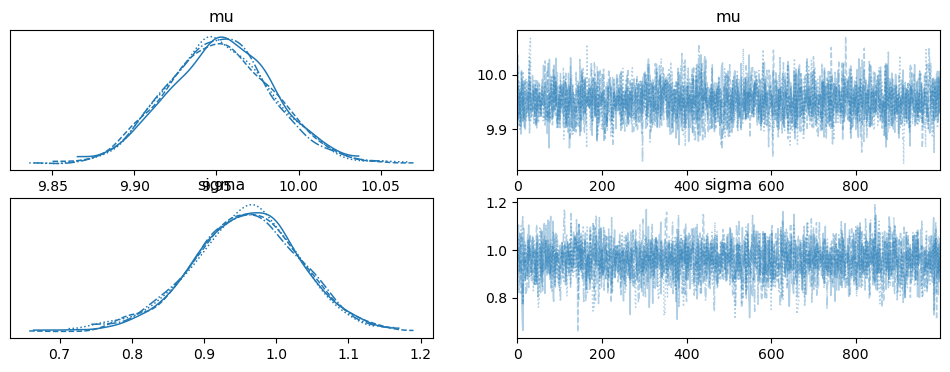

In [7]:
with pm.Model() as model:
    mu=pm.Uniform("mu",0,20)
    sigma=pm.Uniform("sigma",0,20)
    
    s=pm.math.sqrt(sigma**2 + sigma_1**2)
    obs=pm.Normal("obs",mu,s,observed=x_obs)
    trace=pm.sample(draws=1000,tune=1000,chains=4,cores=4,target_accept=0.95)
az.plot_trace(trace)
print(az.summary(trace))

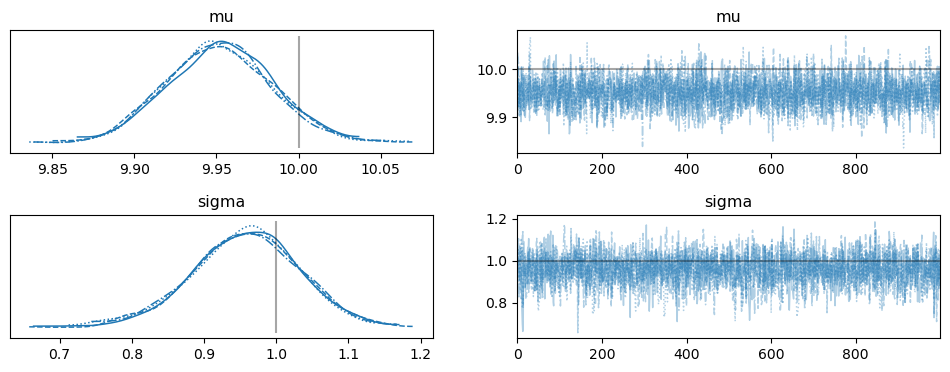

In [8]:
axes=az.plot_trace(            
        trace,
        compact=True,
        var_names=['mu', 'sigma'],
        lines=[
            ('mu', {}, mu_p),         # original mu_P
            ('sigma', {}, sigma_p),   # original sigma_P

        ]
    )
fig = axes.ravel()[0].figure.subplots_adjust(hspace=0.5)
